In [113]:
import os

In [114]:
import pandas as pd
from pandas import option_context
import numpy as np
import requests
import seaborn as sns
import datetime
import cliffsDelta as cd

from tqdm import tqdm
from statsmodels.stats.inter_rater import fleiss_kappa,aggregate_raters
from scipy.stats import mannwhitneyu,shapiro,ttest_ind

In [115]:
QUERY_ROOT = "https://api.github.com"
TOKEN = os.getenv("TOKEN") # write your GitHub API key here
HEADERS={'Authorization':'token '+TOKEN}

## Section 3

### Question 1

#### Write an automated Python script to identify the GitHub Apps in the list of accounts, by calling the GitHub Users API and extracting the required information to make this decision. 

#### More information: You can search for the "type" key in the obtianed JSON result, If it is "Bot", then it is an app, if it is "User", then it is an account.

In [116]:
# 1. Read the given .csv file into a pandas DataFrame (df).
# 2. Make sure there are 2 columns, one column name is "contributor" that has the name of the contributor, 
#    and another column name is "bothunter" that you will use later on in this assignment.
# 3. Display the DataFrame.

# YOUR CODE BELOW
df = pd.read_csv('microsoft_winget-pkgs_1/microsoft_winget-pkgs_1.csv')
df.columns = ['contributor','bothunter']
print(df)



                             contributor bothunter
0                                matbech     Human
1                         oxygen-dioxide     Human
2                                  gertd     Human
3                           babblebauble     Human
4                               mecgmecg     Human
5                        DattatreyaReddy     Human
6                              wingetbot       Bot
7                              Cyberboss     Human
8                        Rust-Winget-Bot       Bot
9   microsoft-github-policy-service[bot]       Bot
10                  LeonGungadinMogensen       Bot
11                         TheBossMagnus     Human
12                               erikbra     Human
13                               MabelYT     Human
14                               Alphrag     Human
15                            Dragon1573     Human
16                                 doms9       Bot
17                              prql-bot       Bot
18                             

In [117]:
# 1. Store the names of the contributors in a list using the code snippet: 'df.contributor.to_list()'
# 2. print the list

# YOUR CODE BELOW
contributors = df.contributor.to_list()
print(contributors)

['matbech', 'oxygen-dioxide', 'gertd', 'babblebauble', 'mecgmecg', 'DattatreyaReddy', 'wingetbot', 'Cyberboss', 'Rust-Winget-Bot', 'microsoft-github-policy-service[bot]', 'LeonGungadinMogensen', 'TheBossMagnus', 'erikbra', 'MabelYT', 'Alphrag', 'Dragon1573', 'doms9', 'prql-bot', 'pxwiz', 'jnichols35', 'ClementTsang', 'kbdharun', 'dotnet-winget-bot', 'Witchilich', 'momento-github-actions-machine-user', 'ousugo', 'anamnavi', 'tiksn', 'BiosPlus', 'chausner', 'SpecterShell', 'Masamune3210', 'matracey', 'azure-sdk', 'rsteube-bot', 'nebula-it', 'JamieMagee', 'blockstack-devops', 'ryfu-msft', 'PckgrBot']


In [118]:
# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
#    You can use "query = f'{QUERY_ROOT}/users/{contributor}'", where QUERY_ROOT is defined at the beginning of this notebook 
#    above and 'contributor' is each individul contributor from the list
# 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
# 3. convert the response to JSON using 'json_response = response.json()'.
# 4. Iterate over this JSON response and get the value of the 'type' key. If it is "Bot" then the contributor is an App, 
#    if "User" then the contributor is an account. You should boolean values to indicate if the contributor is an App (True) or User/Organisation (False)
# 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
#    Lets call this list as "app_list_dict"
# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
# 7. Display the DataFrame. This should have two columns - contributor and app

# YOUR CODE BELOW
app_dict = []
for contributor in contributors:
    query = f'{QUERY_ROOT}/users/{contributor}'
    response = requests.get(query, headers=HEADERS)
    json_response = response.json()
    if json_response['type'] == 'Bot':
        app_dict.append({'contributor':contributor,'app':True})
    else:
        app_dict.append({'contributor':contributor,'app':False})
app_df = pd.DataFrame.from_dict(app_dict)
print(app_df)

                             contributor    app
0                                matbech  False
1                         oxygen-dioxide  False
2                                  gertd  False
3                           babblebauble  False
4                               mecgmecg  False
5                        DattatreyaReddy  False
6                              wingetbot  False
7                              Cyberboss  False
8                        Rust-Winget-Bot  False
9   microsoft-github-policy-service[bot]   True
10                  LeonGungadinMogensen  False
11                         TheBossMagnus  False
12                               erikbra  False
13                               MabelYT  False
14                               Alphrag  False
15                            Dragon1573  False
16                                 doms9  False
17                              prql-bot  False
18                                 pxwiz  False
19                            jnichols35

### Question 2

#### Add an app column in the CSV file to store this information. You can write True if it is an app and False if it is not.


In [119]:
# Merge the app DataFrame to df by writing 'pd.merge(df, <app df>, on='contributor'). This is similar to SQL join on primary key 'contributor'.
# The resultant df should have 3 columns - contributor, bothunter and app.

# YOUR CODE BELOW
df = pd.merge(df,app_df,on='contributor')
print(df)

                             contributor bothunter    app
0                                matbech     Human  False
1                         oxygen-dioxide     Human  False
2                                  gertd     Human  False
3                           babblebauble     Human  False
4                               mecgmecg     Human  False
5                        DattatreyaReddy     Human  False
6                              wingetbot       Bot  False
7                              Cyberboss     Human  False
8                        Rust-Winget-Bot       Bot  False
9   microsoft-github-policy-service[bot]       Bot   True
10                  LeonGungadinMogensen       Bot  False
11                         TheBossMagnus     Human  False
12                               erikbra     Human  False
13                               MabelYT     Human  False
14                               Alphrag     Human  False
15                            Dragon1573     Human  False
16            

### Question 3

#### Report on the total number of GitHub Apps, and User accounts present in the list of accounts of your dataset.

In [120]:
app_counts = df['app'].value_counts()
total_apps = app_counts[True]
total_users = app_counts[False]
print("Total GitHub Apps:", total_apps)
print("Total User accounts:", total_users)


Total GitHub Apps: 1
Total User accounts: 39


## Section 4

### Question 1

#### Write an automated script to report on the prediction of the GitHub accounts in your dataset, using BoDeGHa and RABBIT bot identification tools. For each tool, your script should add an extra column to the CSV ﬁle of your dataset, reporting the prediction (bot, human, unknown) of the considered tool on the considered account.

#### More information:
You can write an automated script to execute BoDeGHa and RABBIT, and save the results in a DataFrame. For BoDeGHa, you can ask the tool to give the output in CSV format, save it as a csv file and read it in a DataFrame. For RABBIT, you can use its internal argument to store the results in a .csv file and read it in a DataFrame. Remember to read their Documentation (Readme.md) for their input arguments and example outputs before using these tools.  
Similar to what you did in Section 2 - Question 1 and 2, add an additional column named 'bodegha' to store the predictions 
given by BoDeGHa and add another column called 'rabbit' to store the preditions given by RABBIT. 

In [121]:
# Read the .csv file that has the predicitons given by BoDeGHa.

# YOUR CODE BELOW
bodegha_df = pd.read_csv('microsoft_winget-pkgs_1/bodegha_predictions.csv')
print(bodegha_df)


                             contributor bodegha
0                                Alphrag     Bot
1                               BiosPlus     Bot
2                              Cyberboss     Bot
3                        DattatreyaReddy     Bot
4                   LeonGungadinMogensen     Bot
5                               PckgrBot     Bot
6                        Rust-Winget-Bot     Bot
7                           SpecterShell     Bot
8                               anamnavi     Bot
9                              azure-sdk     Bot
10                          babblebauble     Bot
11                                 doms9     Bot
12                     dotnet-winget-bot     Bot
13                                 gertd     Bot
14                            jnichols35     Bot
15                              kbdharun     Bot
16                               matbech     Bot
17                              matracey     Bot
18                              mecgmecg     Bot
19  microsoft-github

In [122]:
# merge it to df - Now your df should have the following four columns - contributor, bothunter, app, bodegha

# YOUR CODE BELOW
df = pd.merge(df,bodegha_df,how='left',on='contributor')
df['bodegha'] = df['bodegha'].fillna('Unknown')

print(df)



                             contributor bothunter    app  bodegha
0                                matbech     Human  False      Bot
1                         oxygen-dioxide     Human  False  Unknown
2                                  gertd     Human  False      Bot
3                           babblebauble     Human  False      Bot
4                               mecgmecg     Human  False      Bot
5                        DattatreyaReddy     Human  False      Bot
6                              wingetbot       Bot  False      Bot
7                              Cyberboss     Human  False      Bot
8                        Rust-Winget-Bot       Bot  False      Bot
9   microsoft-github-policy-service[bot]       Bot   True      Bot
10                  LeonGungadinMogensen       Bot  False      Bot
11                         TheBossMagnus     Human  False  Unknown
12                               erikbra     Human  False  Unknown
13                               MabelYT     Human  False  Unk

In [123]:
# Read the predictions given by RABBIT from the corresponding .csv file 

# YOUR CODE BELOW
rabbit_df = pd.read_csv('microsoft_winget-pkgs_1/rabbit_predictions.csv')
print(rabbit_df)


    Unnamed: 0                           contributor   rabbit  confidence
0            0                               matbech      bot       0.283
1            1                        oxygen-dioxide    human       0.999
2            2                                 gertd    human       0.999
3            3                          babblebauble      bot       0.484
4            4                              mecgmecg  unknown         NaN
5            5                       DattatreyaReddy    human       0.997
6            6                             wingetbot      bot       0.999
7            7                             Cyberboss    human       0.999
8            8                       Rust-Winget-Bot      bot       0.998
9            9  microsoft-github-policy-service[bot]      app       1.000
10          10                  LeonGungadinMogensen      bot       0.958
11          11                         TheBossMagnus    human       0.999
12          12                        

In [124]:
# merge it to df - Now your df should have the following five columns - contributor, bothunter, app, bodegha, rabbit

# YOUR CODE BELOW
df = pd.merge(df,rabbit_df[['contributor','rabbit']],on='contributor')
print(df)



                             contributor bothunter    app  bodegha   rabbit
0                                matbech     Human  False      Bot      bot
1                         oxygen-dioxide     Human  False  Unknown    human
2                                  gertd     Human  False      Bot    human
3                           babblebauble     Human  False      Bot      bot
4                               mecgmecg     Human  False      Bot  unknown
5                        DattatreyaReddy     Human  False      Bot    human
6                              wingetbot       Bot  False      Bot      bot
7                              Cyberboss     Human  False      Bot    human
8                        Rust-Winget-Bot       Bot  False      Bot      bot
9   microsoft-github-policy-service[bot]       Bot   True      Bot      app
10                  LeonGungadinMogensen       Bot  False      Bot      bot
11                         TheBossMagnus     Human  False  Unknown    human
12          

In [125]:
# Replace the prediction result given by rabbit from 'bot' to 'Bot', 'app' to 'Bot', 'human' to 'Human', 'unknown' to 'Unknown' to maintain consistency

# YOUR CODE BELOW
df['rabbit'] = df['rabbit'].replace({'bot':'Bot','app':'Bot','human':'Human','unknown':'Unknown'})
print(df)


                             contributor bothunter    app  bodegha   rabbit
0                                matbech     Human  False      Bot      Bot
1                         oxygen-dioxide     Human  False  Unknown    Human
2                                  gertd     Human  False      Bot    Human
3                           babblebauble     Human  False      Bot      Bot
4                               mecgmecg     Human  False      Bot  Unknown
5                        DattatreyaReddy     Human  False      Bot    Human
6                              wingetbot       Bot  False      Bot      Bot
7                              Cyberboss     Human  False      Bot    Human
8                        Rust-Winget-Bot       Bot  False      Bot      Bot
9   microsoft-github-policy-service[bot]       Bot   True      Bot      Bot
10                  LeonGungadinMogensen       Bot  False      Bot      Bot
11                         TheBossMagnus     Human  False  Unknown    Human
12          

In [126]:
#df.to_csv('manual.csv')

### Question 2

#### Add an extra column to the CSV ﬁle called 'manual' that has the label determined by you. For each account, of your own opinion on its nature (bot, human or unknown only in case of doubt) on the basis of a manual veriﬁcation of the contributor’s activities in the repository through the GitHub UI and through the GitHub Events API https://api.github.com/users/username/events, and taking into account the prediction made by the bot identification tools.

#### More information:
For each contributor, look at their activities in GitHub UI, look at their latest events using GitHub Events API - https://api.github.com/users/<contributor\>/events, to make a decision on their type. 

In addition, you should also write a very small reason why do you think they are bot or human (e.g., same activity at regular interval so Bot, files committed and code modified looks like Human, comments look like Human, comment look like Bot, test report looks automated so Bot, and so on....). This might be useful to answer the next question as well.

In [127]:
# Write your manual decision here
# example : 
# manual_list_dict = [{'contributor': 'tommens', 'manual': 'human'}, {....}, {....}, {....}]
# pd.DataFrame.from_dict(manual_list_dict)

# YOUR CODE BELOW
manual_csv =  pd.read_csv('microsoft_winget-pkgs_1/manual.csv')
print(manual_csv)



    Unnamed: 0                           contributor bothunter    app  \
0            0                               matbech     Human  False   
1            1                        oxygen-dioxide     Human  False   
2            2                                 gertd     Human  False   
3            3                          babblebauble     Human  False   
4            4                              mecgmecg     Human  False   
5            5                       DattatreyaReddy     Human  False   
6            6                             wingetbot       Bot  False   
7            7                             Cyberboss     Human  False   
8            8                       Rust-Winget-Bot       Bot  False   
9            9  microsoft-github-policy-service[bot]       Bot   True   
10          10                  LeonGungadinMogensen       Bot  False   
11          11                         TheBossMagnus     Human  False   
12          12                               erikbr

In [128]:
# merge it with df of predictions. Now your df should have the following six columns
# contributor, bothunter, app, bodegha, rabbit, manual

# YOUR CODE BELOW
print(manual_csv)


    Unnamed: 0                           contributor bothunter    app  \
0            0                               matbech     Human  False   
1            1                        oxygen-dioxide     Human  False   
2            2                                 gertd     Human  False   
3            3                          babblebauble     Human  False   
4            4                              mecgmecg     Human  False   
5            5                       DattatreyaReddy     Human  False   
6            6                             wingetbot       Bot  False   
7            7                             Cyberboss     Human  False   
8            8                       Rust-Winget-Bot       Bot  False   
9            9  microsoft-github-policy-service[bot]       Bot   True   
10          10                  LeonGungadinMogensen       Bot  False   
11          11                         TheBossMagnus     Human  False   
12          12                               erikbr

### Question 3

#### Study and report the purpose of these identified bots and humans in the repository assigned to you. 

For example, the purpose can be based on but not limited to - 

the type of activities that they are performing (releasing a version on every Sunday, updating the documentation), type of comments they are posting (reviewing code, test summary report), when are they triggered (when a new PR is created, when someone in the project ask the bot to merge the code) and so on. \textbf{Note:} The purpose can be other than what is provided in examples above. 


### Question 4

#### Create a column named 'type' to the CSV ﬁle and write your ﬁnal decision on the type of contributor. The ﬁnal decision on their type is the prediciton that majority of the raters predicted (you can ignore the 'Unknown'), in the case of contradiction, you can finalise it as Human.
#### Case 1: If two raters has mentioned a contributor as Bot and others mentioned it as 'Unknown', then the type of the account is Bot.  
#### Case 2: If 3 raters give 'Unknown' to a contributor then the prediction given by the fourth rater is final.
#### Case 3: If 2 raters give the prediciton as 'Bot' and 2 raters give it as 'Human', then the final decision is 'Human'
#### In this step, GitHub Apps should be marked as App and not as a Bot.

In [129]:
# Make a final decision on the type based on the predictions given by bothunter, bodegha, bothunter and your manual labelling. 
# Now your df should contain seven columns - contributor, bothunter, app, bodegha, rabbit, manual and type

# YOUR CODE BELOW

### Question 5 (a)

#### Compute and report the Fleiss Kappa interrater agreement score between the labels computed by all bot identiﬁcation tools.

##### For example:

converted_df = aggregate_raters(np.array(df[['rater1','rater2']]))  
kappa = fleiss_kappa(converted_df[0])  
print('kappa')  

#### a. between bothunter and rabbit

In [130]:
converted_df_bh_ra = aggregate_raters(np.array(df[['bothunter','rabbit']]))
kappa_bh_ra = fleiss_kappa(converted_df_bh_ra[0])
print(kappa_bh_ra)

0.6284007962840079


#### b. between bothunter and bodegha

In [131]:
converted_df_bh_bd = aggregate_raters(np.array(df[['bothunter','bodegha']]))
kappa_bh_bd = fleiss_kappa(converted_df_bh_bd[0])
print(kappa_bh_bd)

-0.171125694093892


#### c. between bodegha and rabbit

In [132]:
converted_df_bd_ra = aggregate_raters(np.array(df[['bodegha','rabbit']]))
kappa_bd_ra = fleiss_kappa(converted_df_bd_ra[0])
print(kappa_bd_ra)

-0.06721395587480761


#### d. between bothunter, bodegha and rabbit

In [133]:
converted_df_bh_bd_ra = aggregate_raters(np.array(df[['bothunter','bodegha','rabbit']]))
kappa_bh_bd_ra = fleiss_kappa(converted_df_bh_bd_ra[0])
print(kappa_bh_bd_ra)

0.1334730957372466


### Question 5 (b)
#### Report on
#### a. What is you interpretation from the kappa values (use the table provided in the description document)? what do you understand?

In [134]:
#Only bothunter and rabbit have a substancial agreement. The rest has slight agreement.

#### b. Based on your previous analysis, which bot identification tool would you use, if you want to predict if a contributor is a human or bot? Motivate your answer

In [135]:
#I would use rabbit because it seems the best predictions based on other.

## Section 5

#### Query the GitHub Events API to get maximum possible events for each contributor (maximum is 300 events).  
#### You can use the following query: '{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={page}' where page = 1 or 2 or 3  
#### As you did in earlier task, make a request to GitHub Events API with the required headers, convert the response to JSON, extract the following fields and store in a DataFrame:
Event id - json_response['event_id']  
Name of the contributor - json_response['actor']['login']  
Name of the repository - json_response['repository']['name']  
Type of event - json_response['type']  
Time of event - json_response['created_at']

#### Hint: Query the GitHubEvents API for all contributors. Append the obtained JSON result to a list of JSONs. Process one dictionary after other to get your required fields and store them in another list of dictionaries. Finally convert this dictionaty to DataFrame. OR You can directly convert the list of JSONs to DataFrame using pd.json_normalize() and select the required columns alone.

#### The resultant dataframe should have all the recent events performed by all the contributors and the following columns should be present in them - event_id, contributor, repo_name, event_type, created_at.


In [136]:
# YOUR CODE BELOW
# List to store the JSON responses for each contributor
json_responses = []

# Iterate over each contributor
for contributor in contributors:
    page = 1
    while True:
        # Make a request to the GitHub Events API
        query=f'{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={page}'

        response = requests.get(query, headers=HEADERS)
        json_response = response.json()
        
        # Append the JSON response to the list
        json_responses.append(json_response)
        
        # Break the loop if there are no more events or we have reached the maximum limit of 300 events
        if not json_response or page == 3:
            break
        
        # Increment the page number
        page += 1

# List to store the required fields for each event
events_list = []

# Process each JSON response
for json_response in json_responses:
    for event in json_response:
        event_id = event['id']
        contributor = event['actor']['login']
        repo_name = event['repo']['name']
        event_type = event['type']
        created_at = event['created_at']
        
        # Append the fields to the list of events
        events_list.append({'event_id': event_id, 'contributor': contributor, 'repo_name': repo_name, 'event_type': event_type, 'created_at': created_at})

# Create a DataFrame from the list of events
events_df = pd.DataFrame(events_list)

# Display the DataFrame
print(events_df)


         event_id contributor              repo_name        event_type  \
0     36963116436     matbech          dnSpyEx/dnSpy        WatchEvent   
1     36954485568     matbech    matbech/winget-pkgs       DeleteEvent   
2     36951809113     matbech  microsoft/winget-pkgs  PullRequestEvent   
3     36951808846     matbech    matbech/winget-pkgs         PushEvent   
4     36951808110     matbech    matbech/winget-pkgs         PushEvent   
...           ...         ...                    ...               ...   
7760  36487105036    PckgrBot   PckgrBot/winget-pkgs         PushEvent   
7761  36487103488    PckgrBot   PckgrBot/winget-pkgs       CreateEvent   
7762  36487089210    PckgrBot  microsoft/winget-pkgs  PullRequestEvent   
7763  36487088592    PckgrBot   PckgrBot/winget-pkgs         PushEvent   
7764  36487087059    PckgrBot   PckgrBot/winget-pkgs       CreateEvent   

                created_at  
0     2024-03-28T10:56:10Z  
1     2024-03-28T05:16:06Z  
2     2024-03-28T02:18:1

### Question 1
#### Group each event into the following four categories

Issues: IssueCommentEvent, IssuesEvent  
Pull Requests: PullRequestEvent, PullRequestReviewCommentEvent  
Commits: CommitCommentEvent, PushEvent  
Repository: CreateEvent, DeleteEvent, ForkEvent, GollumEvent, MemberEvent, PublicEvent, ReleaseEvent, SponsorshipEvent, WatchEvent  

#### Hint:
1. Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.  
2. Then perform groupby on ['contributor','event_group'],  
3. use .agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) to count the number of events performed by each contributor in each group,  
4. use pivot with the required arguments (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). An example is given [here](#pivot_example) in question 2(b), and  
5. finally merge it with your 'type' field from the DataFrame you got in Section4

The final DataFrame should be looking like the following  
![](event_group.png)

In [137]:
# In the resultant DataFrame - each row should corespond to a contributor, and the columns should have all the event groups  
# and the type of the contributor (that you decided in the previous DataFrame) and the values should be the number 
# of events of that event event group the contriubutor has performed.

issue_group = ['IssueCommentEvent', 'IssuesEvent']
pr_group = ['PullRequestEvent', 'PullRequestReviewCommentEvent']
commit_group = ['CommitCommentEvent', 'PushEvent']
repo_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']

In [138]:
# YOUR CODE BELOW
#Add a columns to envents_df called 'event_group' and assign the event group based on the event_type
events_df['event_group'] = np.where(events_df['event_type'].isin(issue_group), 'issue', 
                                    np.where(events_df['event_type'].isin(pr_group), 'pr', 
                                             np.where(events_df['event_type'].isin(commit_group), 'commit', 
                                                      np.where(events_df['event_type'].isin(repo_group), 'repo', 'other'))))

#Groupby on contributor and event_group
events_df_groupby = events_df.groupby(['contributor', 'event_group']).size().unstack(fill_value=0)


In [139]:
print(events_df_groupby)

event_group                           commit  issue  other   pr  repo
contributor                                                          
Alphrag                                   60      5      0   24    56
BiosPlus                                  76      7      0   71   145
ClementTsang                             130     27      5   65    69
Cyberboss                                111     23     15   47    59
DattatreyaReddy                           20     16      1   22    33
Dragon1573                                65     99     10   38    76
JamieMagee                               116     32     49   42    32
LeonGungadinMogensen                      92      0      0   12    34
MabelYT                                   69      3      0    3    48
Masamune3210                               4     49      2    4     3
PckgrBot                                  96     15      1  101    87
Rust-Winget-Bot                           91      0      0    6    12
SpecterShell        

In [140]:
#Use pivot
events_df_pivot = events_df.pivot_table(index='contributor', columns='event_group', values='event_id', aggfunc='count', fill_value=0)
print(events_df_pivot)

event_group                           commit  issue  other   pr  repo
contributor                                                          
Alphrag                                   60      5      0   24    56
BiosPlus                                  76      7      0   71   145
ClementTsang                             130     27      5   65    69
Cyberboss                                111     23     15   47    59
DattatreyaReddy                           20     16      1   22    33
Dragon1573                                65     99     10   38    76
JamieMagee                               116     32     49   42    32
LeonGungadinMogensen                      92      0      0   12    34
MabelYT                                   69      3      0    3    48
Masamune3210                               4     49      2    4     3
PckgrBot                                  96     15      1  101    87
Rust-Winget-Bot                           91      0      0    6    12
SpecterShell        

In [141]:
#Merge pivot and df manual
final_df = pd.merge(manual_csv[['contributor','type']], events_df_pivot, on='contributor')
print(final_df)

                             contributor   type  commit  issue  other   pr  \
0                                matbech    Bot      39     12      0   25   
1                         oxygen-dioxide  Human     119     35      0   37   
2                                  gertd  Human      98      6     24   73   
3                           babblebauble    Bot      50     10      0   16   
4                        DattatreyaReddy  Human      20     16      1   22   
5                              wingetbot    Bot       2    172      0    2   
6                              Cyberboss  Human     111     23     15   47   
7                        Rust-Winget-Bot    Bot      91      0      0    6   
8   microsoft-github-policy-service[bot]    Bot      15    134     13   13   
9                   LeonGungadinMogensen    Bot      92      0      0   12   
10                         TheBossMagnus  Human     165     15      2    9   
11                               erikbra  Human     195     23  

In [142]:
# YOUR CODE BELOW


### Question 2 (a)

#### Compute the median number of events per event group for Bot+Apps and Humans and write in DataFrame.

Row should correspond to type (Bot_App and Human), Column should have Event group name and the values should be the median value of Bot_App or Human for that particular event group. An example is given below

In [143]:
# For example:
medians = [{'event_group': 'event_group1', 'median': 'val1', 'type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [144]:
# YOUR CODE BELOW
medians = []
for event_group in events_df_pivot.columns:
    for type in final_df['type'].unique():
        median = final_df[final_df['type'] == type][event_group].median()
        medians.append({'event_group': event_group, 'median': median, 'type': type})

df_medians = pd.DataFrame.from_dict(medians)
print(df_medians)

  event_group  median   type
0      commit    88.0    Bot
1      commit    71.0  Human
2       issue     2.0    Bot
3       issue    11.5  Human
4       other     0.0    Bot
5       other     3.5  Human
6          pr    16.0    Bot
7          pr    33.5  Human
8        repo    39.0    Bot
9        repo    51.5  Human


### Question 2 (b)

Plot a heatmap of the DataFrame using seaborn - 
1. First convert the dataframe to the required format using pivot, example is given below
2. plot using seaborn - sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest"). More details: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### pd.pivot example:
<a id='pivot_example'></a>

In [145]:
# Main DataFrame
medians = [{'event_group': 'event_group1', 'median': 'val1', 'type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [146]:
# pivot the main DataFrame
df_medians.pivot(index='type', columns='event_group', values='median')#.reset_index().rename_axis(None,axis=1)

event_group,event_group1,event_group2,event_group3,event_group4,event_group5
type,,,,,
Bot_app,val1,val3,val5,val7,NaN
Human,val2,val4,val6,NaN,val8


In [147]:
# YOUR CODE BELOW
medians = []
for event_group in events_df_pivot.columns:
    for type in final_df['type'].unique():
        median = final_df[final_df['type'] == type][event_group].median()
        medians.append({'event_group': event_group, 'median': median, 'type': type})

df_medians = pd.DataFrame.from_dict(medians)
print(df_medians)

  event_group  median   type
0      commit    88.0    Bot
1      commit    71.0  Human
2       issue     2.0    Bot
3       issue    11.5  Human
4       other     0.0    Bot
5       other     3.5  Human
6          pr    16.0    Bot
7          pr    33.5  Human
8        repo    39.0    Bot
9        repo    51.5  Human


event_group  commit  issue  other    pr  repo
type                                         
Bot            88.0    2.0    0.0  16.0  39.0
Human          71.0   11.5    3.5  33.5  51.5


<Axes: xlabel='event_group', ylabel='type'>

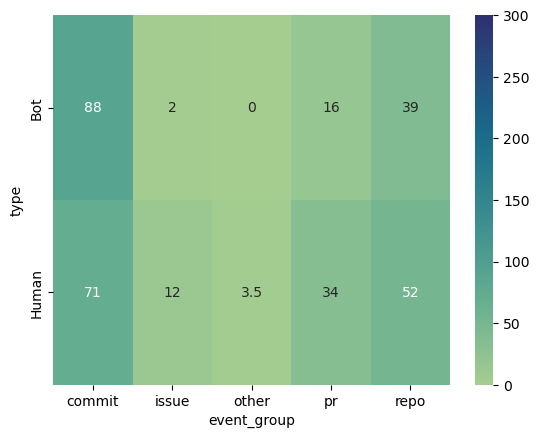

In [148]:
# YOUR CODE BELOW
df_pivot = df_medians.pivot(index='type', columns='event_group', values='median')#.reset_index().rename_axis(None,axis=1)

print(df_pivot)

#Heatmap of the median values
sns.heatmap(df_pivot, annot=True, vmin=0, vmax=300, cmap="crest")


#### What is the difference that you observe between Bots+Apps and Humans?

In [149]:
#Bot open less issues and pull requests than humans. But they have more commits.

#### What is the differnce that you observe between Event groups?

In [150]:
#Every repo does not have a pull request but a lot of repo have multiple commits.

#### What is the difference that you observe between Bots+Apps and Humans and Event groups all considering at the same time?

In [151]:
#The number of events are following the same pattern with different numbers in humand and bots.

### Question 3

#### Create box plots or boxen plots or violin plots or a combination of these to visualise the distribution of number of events in each event group. 
#### For more information you can visit - https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### For violin plots - https://seaborn.pydata.org/generated/seaborn.violinplot.html  
#### You should highlight the data points that correspond to bots using a stripplot in seaborn. https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### Interpret the results of the visualisation.

In [152]:
events_group_df = pd.DataFrame(events_list)
print(events_group_df)

         event_id contributor              repo_name        event_type  \
0     36963116436     matbech          dnSpyEx/dnSpy        WatchEvent   
1     36954485568     matbech    matbech/winget-pkgs       DeleteEvent   
2     36951809113     matbech  microsoft/winget-pkgs  PullRequestEvent   
3     36951808846     matbech    matbech/winget-pkgs         PushEvent   
4     36951808110     matbech    matbech/winget-pkgs         PushEvent   
...           ...         ...                    ...               ...   
7760  36487105036    PckgrBot   PckgrBot/winget-pkgs         PushEvent   
7761  36487103488    PckgrBot   PckgrBot/winget-pkgs       CreateEvent   
7762  36487089210    PckgrBot  microsoft/winget-pkgs  PullRequestEvent   
7763  36487088592    PckgrBot   PckgrBot/winget-pkgs         PushEvent   
7764  36487087059    PckgrBot   PckgrBot/winget-pkgs       CreateEvent   

                created_at  
0     2024-03-28T10:56:10Z  
1     2024-03-28T05:16:06Z  
2     2024-03-28T02:18:1

<Axes: ylabel='pr'>

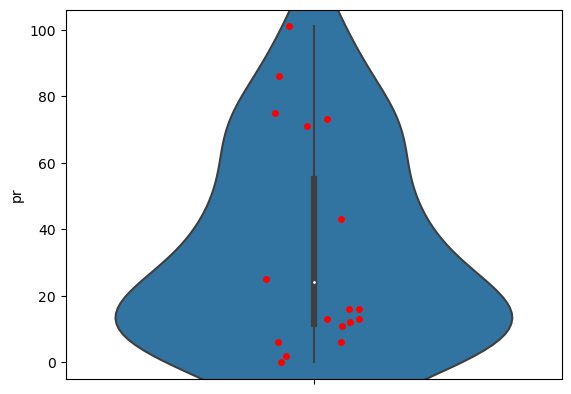

In [175]:
# YOUR CODE BELOW - Visualize number of events from pull request event group

sns.violinplot(data=final_df, y='pr')
sns.stripplot(data=final_df[final_df.type == 'Bot'], y='pr', color='red')


<Axes: ylabel='issue'>

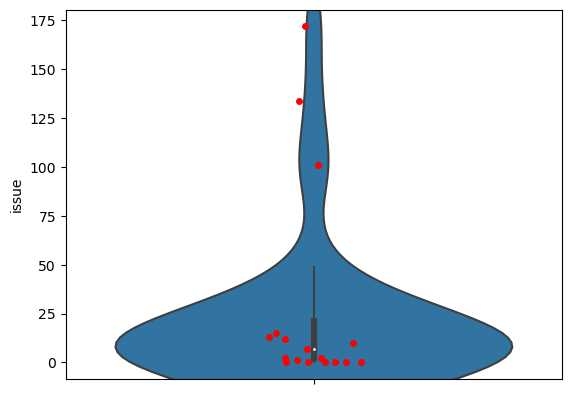

In [176]:
# YOUR CODE BELOW - Visualise number of events from issue event group

sns.violinplot(data=final_df, y='issue')
sns.stripplot(data=final_df[final_df.type == 'Bot'], y='issue', color='red')




<Axes: ylabel='commit'>

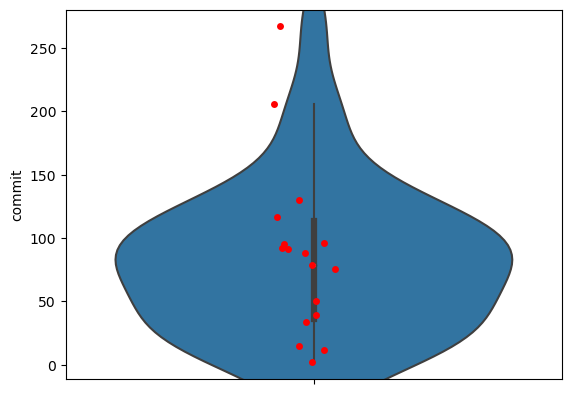

In [177]:
# YOUR CODE BELOW - Visualise number of events from commit event group

sns.violinplot(data=final_df, y='commit')
sns.stripplot(data=final_df[final_df.type == 'Bot'], y='commit', color='red')


<Axes: ylabel='repo'>

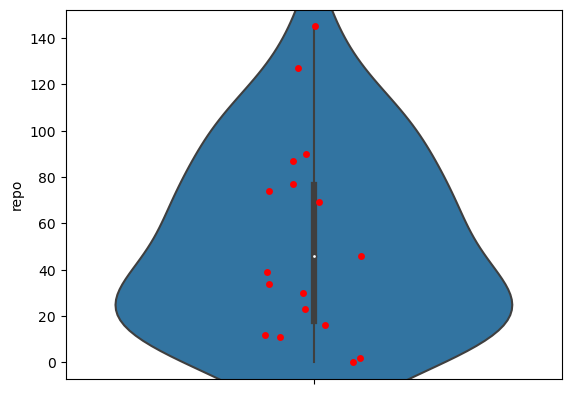

In [178]:
# YOUR CODE BELOW - Visualise number of events from repo event group

sns.violinplot(data=final_df, y='repo')
sns.stripplot(data=final_df[final_df.type == 'Bot'], y='repo', color='red')

### Question 4.1

#### Statistical identify whether number of events in each event group is normally distributed or not.
#### Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
#### Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not. 

#### Use shapiro from scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [185]:
# YOUR CODE BELOW
# Shapiro-Wilk test for normality 
for event_group in events_df_pivot.columns:
    #for type in final_df['type'].unique():
    data = final_df[final_df['type'] == type][event_group]
    stat, p = shapiro(data)
    print(f'{event_group} - {type}: {stat}, {p}')



commit - Human: 0.9623598456382751, 0.5384082198143005
issue - Human: 0.716347336769104, 3.182102955179289e-05
other - Human: 0.7535600662231445, 0.00010211609333055094
pr - Human: 0.9466235637664795, 0.2703186273574829
repo - Human: 0.9269182682037354, 0.10583791136741638


### Question 4.2
#### Determine if there is any statistical diﬀerence in number of events between the identified event groups. Perform this test on all pairs of event groups. 
#### Null hypothesis - $H_0$: Any two event group come from the same population.
#### If $H_0$ is rejected in Shapiro-Wilk test (at least for one of the two event groups considered for test), use the Mann-Whitney U statistical test for this purpose. If $H_0$ is not rejected in Shapiro-Wilk test, use the independent t-test for this purpose.  
#### In any case, use the p-value with a threshold of 0.01 to determine whether $H_0$ can be rejected with statistical significance. 

#### Use mannwhitneyu from scipy.stats to perform Mann-Whitney U test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) 
#### or 
#### ttest_ind from scipy.stats to perform independent t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

#### More information:

You can pass the following arguments to mannwhitneyu from scipy.stats - (method='exact', nan_policy='omit'). For ttest_ind you can use - (nan_policy='omit')

In [180]:
# YOUR CODE BELOW
# Mann-Whitney U test
for event_group in events_df_pivot.columns:
    data_bot = final_df[final_df['type'] == 'Bot'][event_group]
    data_human = final_df[final_df['type'] == 'Human'][event_group]
    stat, p = mannwhitneyu(data_bot, data_human)
    print(f'{event_group}: {stat}, {p}')

commit: 187.0, 1.0
issue: 127.0, 0.09078900014644428
other: 78.0, 0.0008209056285550708
pr: 173.0, 0.7020597956684118
repo: 179.5, 0.8427988976650647


### Question 5
#### Each time you reject the null hypothesis $H_0$, quantify the effect size of the diﬀerence between the groups using cliﬀ’s delta ($\delta$). 
#### To calculate cliﬀ’s delta, you can pass the list of values to cliﬀ delta.py file given in the repository. E.g., cliffsDelta.cliffsDelta(list of values). This will return the effect size and its interpretation (negligible, small, medium, large).

In [181]:
# YOU CODE BELOW
# Cliff's Delta
for event_group in events_df_pivot.columns:
    data_bot = final_df[final_df['type'] == 'Bot'][event_group]
    data_human = final_df[final_df['type'] == 'Human'][event_group]
    delta = cd.cliffsDelta(data_bot, data_human)
    print(f'{event_group}: {delta}')

commit: (0.0, 'negligible')
issue: (-0.32085561497326204, 'small')
other: (-0.5828877005347594, 'large')
pr: (-0.0748663101604278, 'negligible')
repo: (-0.040106951871657755, 'negligible')


### Qusetion 6

#### Create violinplots to visualise the distributions for the following metrics and answer the questions that follow it. You should highlight the data points corresponding to bots using a stripplot in seaborn.

#### Hint:

1. Merge you DataFrame of event with the type of contributor that you identified in section 3.
2. Write a function that you will use for all the seaborn plots. This way you can reduce duplication and update it easily.

In [186]:
# YOUR CODE BELOW - function for seaborn plot


#### Total number of events

In [ ]:
# YOUR CODE BELOW

#### Number of event types

In [ ]:
# YOUR CODE BELOW

#### Mean number of events per event type

In [ ]:
# YOUR CODE BELOW

#### Mean number of events per event group

In [ ]:
# YOUR CODE BELOW

#### Gini coeﬃcient of time between consecutive event

In [ ]:
def time_diffs(time_stamps):
    diff_time_stamps = np.array([])
    for i in range(len(time_stamps)-1):
        diff = (time_stamps.iloc[i+1] - time_stamps.iloc[i])/pd.to_timedelta('1 second')
        diff_time_stamps = np.append(diff_time_stamps, [diff])
    return(diff_time_stamps)

In [ ]:
def gini(time_stamps):
    '''
    args: time_stamps - Series of time stamps for a contributor
    
    return: g_coeff - float that gives gini coefficient
    
    method: calculate the Gini coefficient of a numpy array
    '''
    array = time_diffs(time_stamps)
    array = array[array!=0]
    if len(array) == 0:
        return np.float64(0.0)
    array = array.flatten()
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    g_coeff = (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))
    
    return (g_coeff.round(4))

You can pass a Series of time-stamps to gini(time_stamps) function to get the Gini coeﬃcient
#### Hint:
1. Groupby the contributors on 'contributor' and use gini as .agg function on 'created_at'.
2. Merge the resultant DataFram with their type (the df that you got in section 4)
3. Make box/boxen/violin plots on those gini values

In [ ]:
# YOUR CODE BELOW


In [ ]:
# YOUR CODE BELOW


### Question 6.1

#### Do you ﬁnd any set of accounts having a diverging behaviour? (Hint: look for outliers.)

### Question 6.2

#### What is the type of the accounts that have diverging behaviour?

### Question 6.3

#### Do bots have different behaviour than apps? Motivate your answer

### Question 6.4

#### Do bots and apps have a diﬀerent behaviour from human accounts? (Hint: in the box plots ﬁnd where the bots and apps are located and find where the humans are located)

### Question 6.5

#### Do all bots (other than outliers) have the same behaviour? List the bots that have a diﬀerent behaviour. Mention your interpretation on the cause of this diverging behaviour compared to other bots?